## Project Description

We used Latent Dirichlet allocation to determine topics covered in news articles, TV broadcasts, and tweets relating to COVID-19. Additionally, we analyze the sentiments (positive, negative, neutral) in the messages propagated by these outlets using sentiment analysis. 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

### News Articles

### TV Coverage

In [109]:
aljaz_jan = pd.read_csv('ALJAZ.202001.csv')
aljaz_feb = pd.read_csv('ALJAZ.202002.csv')
aljaz_mar = pd.read_csv('ALJAZ.202003.csv')

aljaz = pd.concat([aljaz_jan, aljaz_feb, aljaz_mar]).reset_index(drop=True)
aljaz.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
aljaz.head()

,Snippet
0,coronavirus here where up here in beijing they...
1,a novel coronavirus a corona virus is a class ...
2,chinese government is i mean it took some time...
3,now on how authorities there are handling the ...
4,prevent you catching the coronavirus. where th...


In [142]:
bbc_jan = pd.read_csv('BBCNEWS.202001.csv')
bbc_feb = pd.read_csv('BBCNEWS.202002.csv')
bbc_mar = pd.read_csv('BBCNEWS.202003.csv')

bbc = pd.concat([bbc_jan, bbc_feb, bbc_mar]).reset_index(drop=True)
bbc.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
bbc.head()

,Snippet
0,"was a “- name. coronavirus, the stars virus wa..."
1,the sars or mers virus? it is called the coron...
2,the authorities there try to control the sprea...
3,typically found in bats. the sars virus and th...
4,oi' to try to know more. is it as severe or th...


In [146]:
rt_jan = pd.read_csv('RT.202001.csv')
rt_feb = pd.read_csv('RT.202002.csv')
rt_mar = pd.read_csv('RT.202003.csv')

rt = pd.concat([rt_jan, rt_feb, rt_mar]).reset_index(drop=True)
rt.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
rt.head()

,Snippet
0,begin as concerns over the coronavirus of seei...
1,a coronavirus outbreak in china reaches 80 acc...
2,of a new virus and it's spreading like wildfir...
3,a new virus and it's spreading like wildfire a...
4,a new virus and it's spreading like wildfire a...


### Tweets

In [16]:
feb_tweets = pd.read_csv('feb_data.csv')
march_tweets = pd.read_csv('march_data.csv')
april_tweets = pd.read_csv('april_data.csv')

tweets = pd.concat([feb_tweets, march_tweets, april_tweets]).reset_index(drop=True)

tweets.head()

,Unnamed: 0,date,text
0,0,2020-02-19 23:59:11,Head nurse Cai Liping of Wuchang Hospital died...
1,1,2020-02-19 23:59:00,This bacteria-killing UV light robot helps a W...
2,2,2020-02-19 23:56:52,For those that are into the business side of s...
3,3,2020-02-19 23:55:34,How to fight against #coronavirus in #japan
4,4,2020-02-19 23:53:03,Diseases like covid-19 are deadlier in non-dem...


## LDA Analysis

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text

In [18]:
def print_topics(topics,vectorizer):
    """
    Prints top 12 most important words for each topic in descending importance
    """
    topic_dists = (topics.components_.T / topics.components_.sum(axis=1)).T
    for comp in range(len(topic_dists)):
        top_i = np.argsort(topic_dists[comp])[-12:][::-1]
        print()
        print([key for key, value in vectorizer.vocabulary_.items() if value in top_i])

In [139]:
def lda(source, janData, febData, marData, chartTitle):
    all_counts = all_vectorizer.fit_transform(source.Snippet)
    all_as_topics = LatentDirichletAllocation(n_components=5, random_state=0, n_jobs=6).fit(all_counts)
    
    print_topics(all_as_topics, all_vectorizer)
    
    # Classify into topics
    source_dists = all_as_topics.transform(all_counts)
    source_labels = np.argmax(source_dists, axis=1)
    source = source.assign(source_labels= source_labels)
    
    # Label tweets by month
    months = pd.Series(["January"] * janData.shape[0] + ['February'] * febData.shape[0] + ['March'] * marData.shape[0])
    source = source.assign(month=months)

    # Get news source counts for each topic
    topic_counts = source.groupby(['source_labels','month']).count()
    topic_counts.columns =['monthly_count']

    unstacked_topics = topic_counts.unstack()
    unstacked_topics = unstacked_topics.monthly_count
    unstacked_topics = unstacked_topics.reindex(columns=['January', 'February', 'March'])

    print(unstacked_topics)
    
    # Plot monthly counts for each topic
    unstacked_topics.plot.bar(figsize=(15,10))
    plt.title(chartTitle)
    plt.xlabel('Topic')
    plt.ylabel('Snippet Count')
    plt.show()

### News Source LDA analysis

In [149]:
my_stops = text.ENGLISH_STOP_WORDS.union(
    
    ['covid', 'coronavirus', 'SARS', 'corona', 'sick',
    'Covid', 'Corona virus', 'Corona', '19', 'hey', 'sars', 'virus', 'covid_19', 
    'just', 'day', 'today', 'new', 'got', 'pandemic', 'death', 'crisis', 'covid19', 'china', 'chinese', 'China','Chinese',
    '2020', 'like', 'people', 'died', 'spread', 'al', 'jazeera', 'abc','bbc','cnn', 'reporter',
    'tonight','patients','confirmed','home','breaking','news', 'outbreak', 'country']

)
all_vectorizer = CountVectorizer(min_df=10, stop_words=my_stops)

#### Al Jazeera


['government', '1st', 'health', 'say', 'infected', 'hong', 'kong', 'person', 'president', 'year', 'medical', 'workers']

['beijing', 'government', 'cases', 'quarantine', 'city', 'tested', 'japan', 'positive', 'passengers', 'cruise', 'ship', 'italy']

['world', 'public', 'travel', 'restrictions', 'impact', 'contain', 'countries', 'economic', 'south', 'measures', 'spreading', 'economy']

['cases', 'health', 'says', 'world', 'organization', 'killed', 'number', '00', 'reported', 'global', 'deaths', 'infections']

['government', 'health', 'says', 'don', 'right', 'going', 'know', 'think', 'said', 'lot', 'really', 've']
month          January  February  March
source_labels                          
0                  656       907    711
1                  655       906    780
2                  508       652   1158
3                  939      1476   1042
4                  947      1059   1004


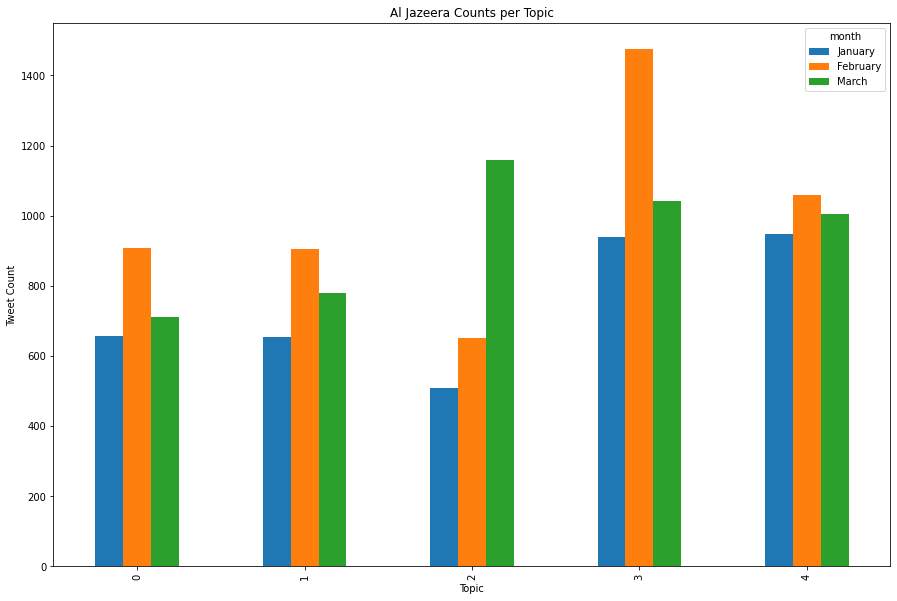

In [150]:
lda(aljaz, aljaz_jan, aljaz_feb, aljaz_mar, 'Al Jazeera Counts per Topic')

#### BBC


['world', 'uk', 'global', 'cases', 'impact', 'let', 'says', 'fears', 'business', 'government', 'markets', 'italy']

['deaths', 'authorities', 'wuhan', 'city', 'world', 'killed', 'cases', 'travel', 'infected', 'number', 'headlines', 'year']

['uk', 'british', 'cases', 'quarantine', 'passengers', 'positive', 'hospital', 'board', 'cruise', 'ship', 'tested', 'princess']

['know', 'spreading', 'don', 'lot', 'going', 'think', 'vaccine', 'trump', 'time', 'things', 'work', 'hands']

['world', 'health', 'organization', 'uk', 'public', 'cases', 'said', 'number', 'says', 'medical', 'government', 'england']
month          January  February  March
source_labels                          
0                  374       972   1259
1                 1570       935    571
2                  343      1094    742
3                 1092      1039   1357
4                  563       960   1071


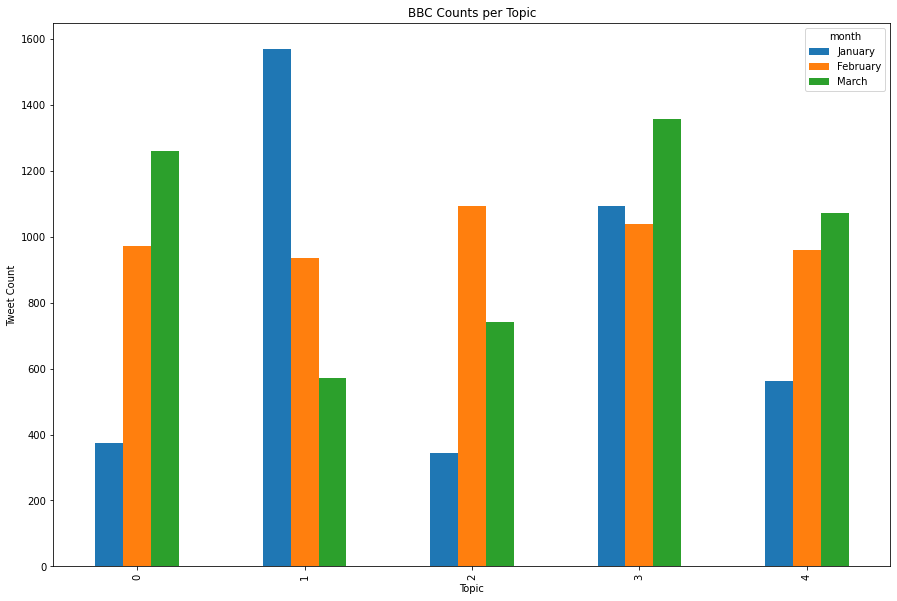

In [151]:
lda(bbc, bbc_jan, bbc_feb, bbc_mar, 'BBC Counts per Topic')

#### Reuters


['right', 'economy', 'know', 'markets', 'let', 'mean', 'going', 'lot', 'really', 'think', 'market', 've']

['right', 'know', 'deadly', 'situation', 'russian', 'going', 'don', 'market', 'coming', 'money', 'problem', 'information']

['know', 'world', 'health', 'organization', 'deal', 'cases', 'russia', '1st', 'situation', 'russian', 'quarantine', 'measures']

['percent', 'world', 'fears', 'russia', 'moscow', 'oil', 'europe', 'week', 'don', 'quarantine', 'time', 'information']

['00', 'infected', 'countries', 'world', 'health', 'number', 'cases', 'russia', '1st', 'outside', 'year', 'united']
month          January  February  March
source_labels                          
0                  208      1189    617
1                  119       659    373
2                  196       618    319
3                  162       586    625
4                  391       977    495


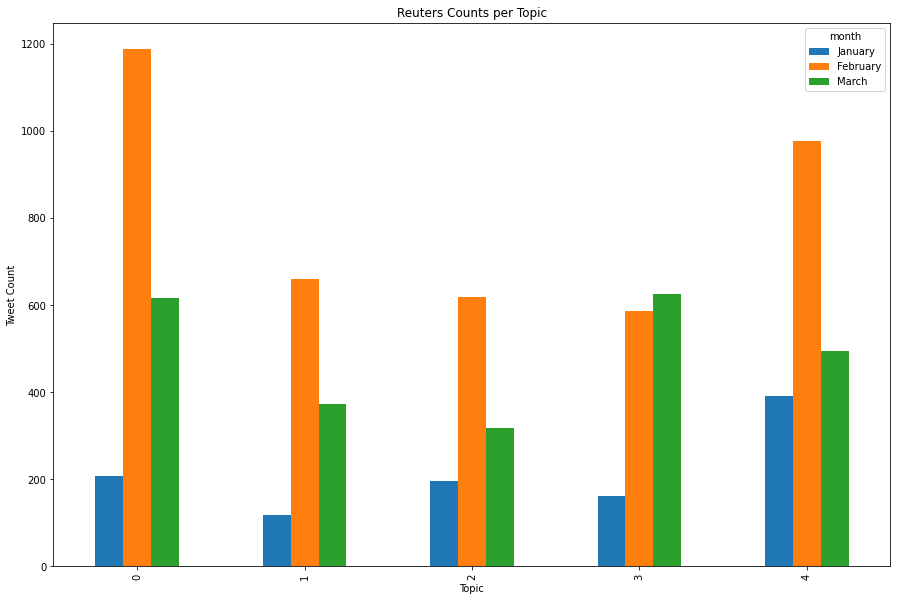

In [152]:
lda(rt, rt_jan, rt_feb, rt_mar, 'Reuters Counts per Topic')

### Interpretation of Results

We chose to focus on three seemingly different news outlets: Al Jazeera (a Qatari TV channel), BBC (a British news source), and Reuters (a news source largely concerned with financial market data). The characteristics of these outlets are reflected in the topics uncovered using LDA. The stop words we used were common to all the news sources so that we could uncover any true topic differences between them. 

Al Jazeera broadcast a lot of information about the state of the virus worldwide. We found topics with key words such as travel, south, hong, kong, beijing, travel, global, and countries. Notably, we saw that a topic with key words 'world', 'public', 'travel', 'restrictions', 'spreading', and 'economy' had increasing occurrences from January to March. This topic was likely about the fall-out of the spread of the virus (on travel restrictions and the economy for example).

BBC on the other hand expectedly had a lot more content pertaining to Britain; multiple topics contained key words such as uk, british, and england. The second topic saw a lot more occurences in January and then decreased in mention in the following months. This topic was likely about Chinese cases since it contained key words "wuhan" and "travel." 

Reuters expectedly had more financial topics. Many topics share key words economy, markets, and money. Many topics also contain the world "global," indicating that Reuters was likely looking at financial trends around the world. The first topic with key words "think," "economy," and "markets" possibly contains all the broadcasts reacting to the Chinese economy shutting down in January since the number of occurrences for this topic peaks in February.   

## Sentiment Analysis

In [62]:
# import vader sentiment analysis module and word tokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [110]:
#initialize vader module
sid = SentimentIntensityAnalyzer()

In [111]:
# splits text into sentences/words
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [127]:
# print sentiment distribution for entire snippet collection 
def sentimentDistributionCalc(tokenizedSnippets):
    posSum = 0
    negSum = 0
    neuSum = 0
    keyCount = 0
    for snippet in tokenizedSnippets:
        scores = sid.polarity_scores(snippet)
        for key in sorted(scores):
            if(key == 'pos'):
                posSum += scores[key]
                keyCount = keyCount + 1
            if(key == 'neg'):
                negSum += scores[key]
            if(key == 'neu'):
                neuSum += scores[key]

    print("positive: ", posSum/keyCount, "\n", 
         "negative: ", negSum/keyCount, "\n",
         "neutral: ", neuSum/keyCount, "\n")

In [125]:
# generating list of all broadcast snippets
bbcSnippets = []
for e in bbc[bbc.columns[0]]: 
    bbcSnippets.append(e)

In [126]:
# tokenize the entire body of broadcast snippets
bbcSnippetsTokenized = tokenizer.tokenize(''.join(bbcSnippets))

In [128]:
sentimentDistributionCalc(bbcSnippetsTokenized)

positive:  0.05896665363148327 
 negative:  0.0688866650076431 
 neutral:  0.8713987699527193 



In [129]:
aljazSnippets = []
for e in aljaz[aljaz.columns[0]]: 
    aljazSnippets.append(e)

aljazeeraSnippetsTokenized = tokenizer.tokenize(''.join(aljazSnippets))

sentimentDistributionCalc(aljazeeraSnippetsTokenized)

positive:  0.056321025641025604 
 negative:  0.0858605128205131 
 neutral:  0.8569214102564117 



In [130]:
rtSnippets = []
for e in rt[rt.columns[0]]: 
    rtSnippets.append(e)

rtSnippetsTokenized = tokenizer.tokenize(''.join(rtSnippets))

sentimentDistributionCalc(rtSnippetsTokenized)

positive:  0.06961255506607932 
 negative:  0.08692797356828227 
 neutral:  0.8421451541850234 



In [131]:
tweetSnippets = []
for e in tweets.text: 
    tweetSnippets.append(e)

tweetsTokenized = tokenizer.tokenize(''.join(tweetSnippets))

sentimentDistributionCalc(tweetsTokenized)

positive:  0.09287572090919377 
 negative:  0.09208515209770446 
 neutral:  0.812213162953749 



### Interpretation of Results

The sentiment across all of the media platforms is largely neutral. However, there is an interesting difference between positive and neutral sentiment when it comes to news sources versus tweets. News sources consistently have more negative content (as indicated by a higher ratio of positively-scored content to negatively-scored content across TV broadcast snippets). Yet, tweets have a nearly one-to-one positive-to-negative sentiment ratio. This discrepancy may be because news sources having to report the dire outfall of the virus, while tweets also include messages of hope and support. 